# Understand `grids` Module

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1l5wLmnIiH1DBJqo5vjPHLa9-WPaX8ZAv/view?usp=drive_link)

*Author: Zakariya Abugrin | Date: November 2023*

## Introduction

In this tutorial, we will see how the `grids` module is an essential part of any model in `reservoirflow` which allows to create a grid model. Currently, only `RegularCartesian` grid models are supported. In the near future, `Radial` and `IrregularCartesian` models will be added.

In [1]:
import reservoirflow as rf

print(rf.__version__)

0.1.0


### Create 1D Model

Grid model dimensionality can be defined based on `nx, ny, nz` arguments as following: 

In [2]:
# Create a 1D regular cartesian grid:
grid = rf.grids.RegularCartesian(
    nx=4,
    ny=1,
    nz=1,
    dx=200,
    dy=200,
    dz=40,
    phi=0.27,
    kx=270,
    ky=200,
    kz=10,
    comp=1e-6,
    unit="field",
)

In [3]:
print(rf.grids.RegularCartesian.__doc__)

Regular Cartesian grid class.

    Returns
    -------
    Grid
        Regular Cartesian grid object.
    


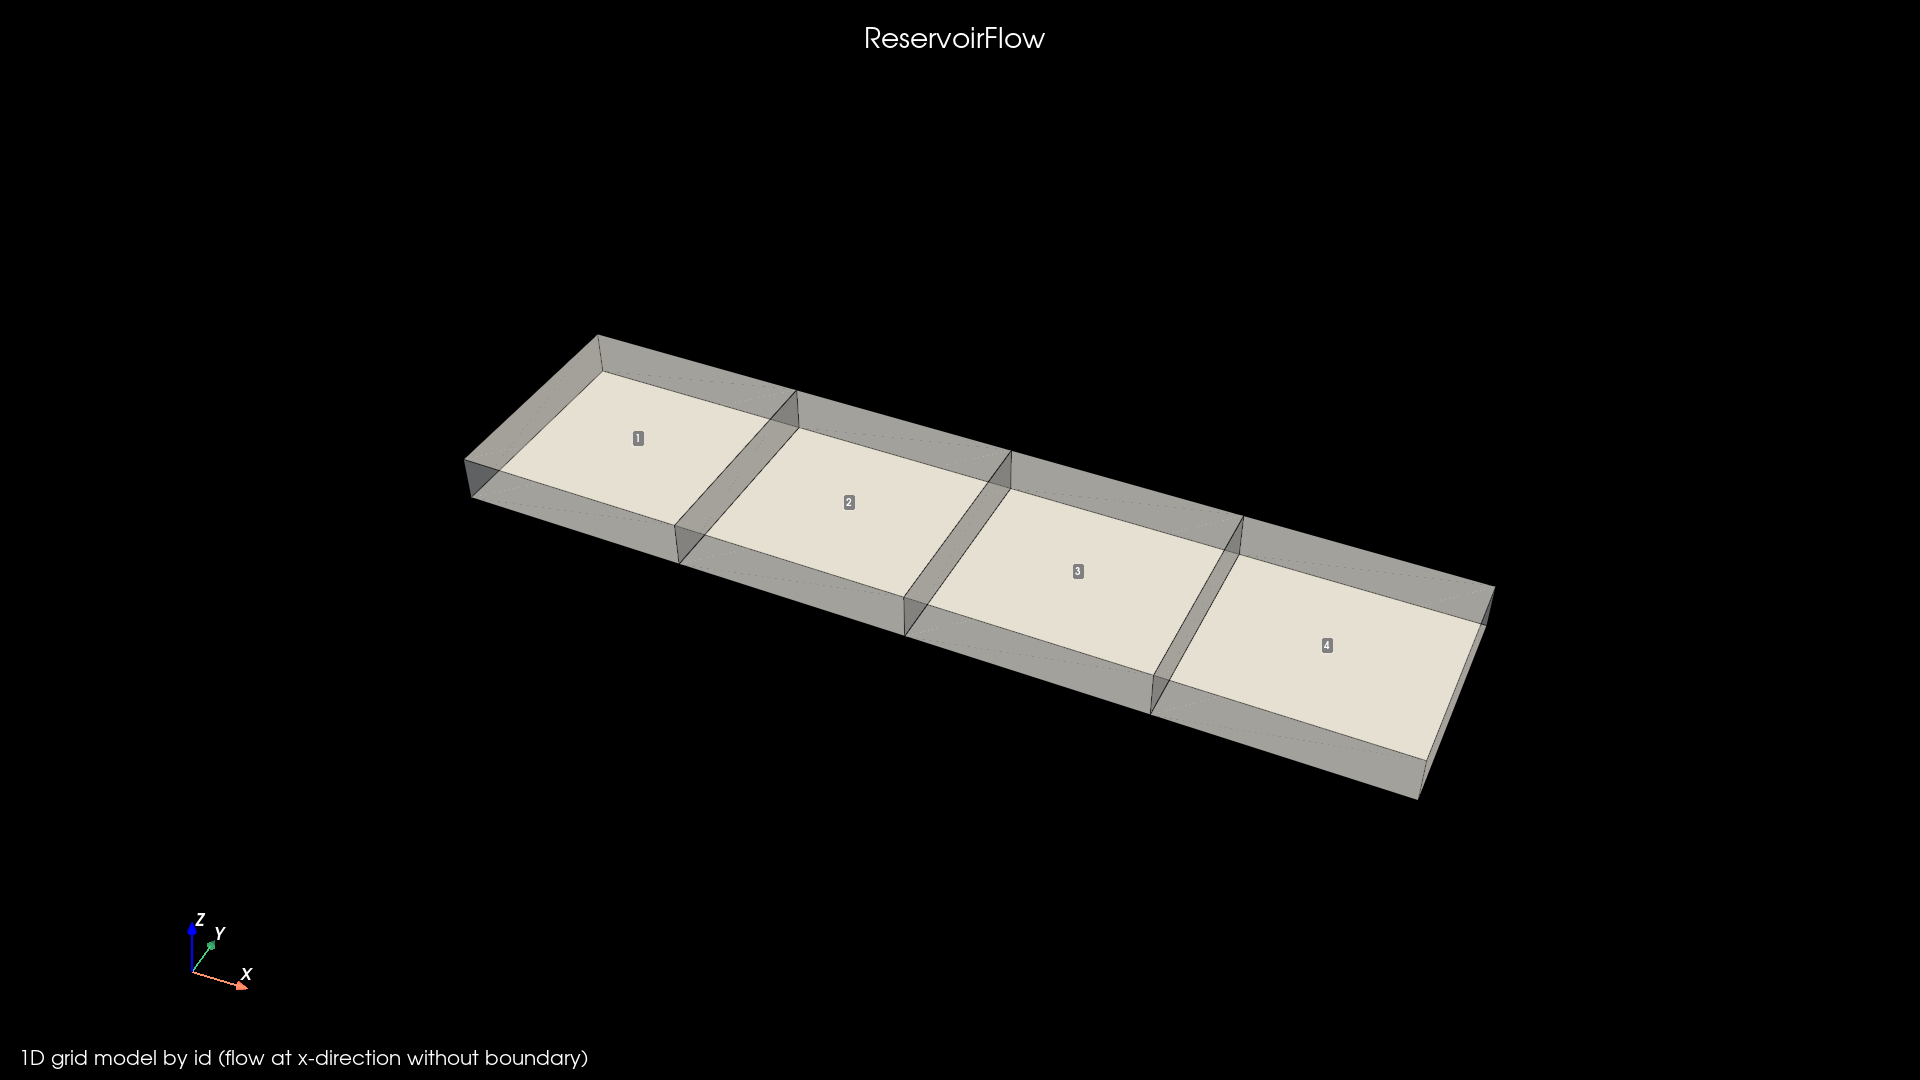

In [15]:
# Show the grid model with cells id
a = grid.show(
    label="id",
    boundary=False,
    static=True,
    notebook=True,
    azimuth=25,
)

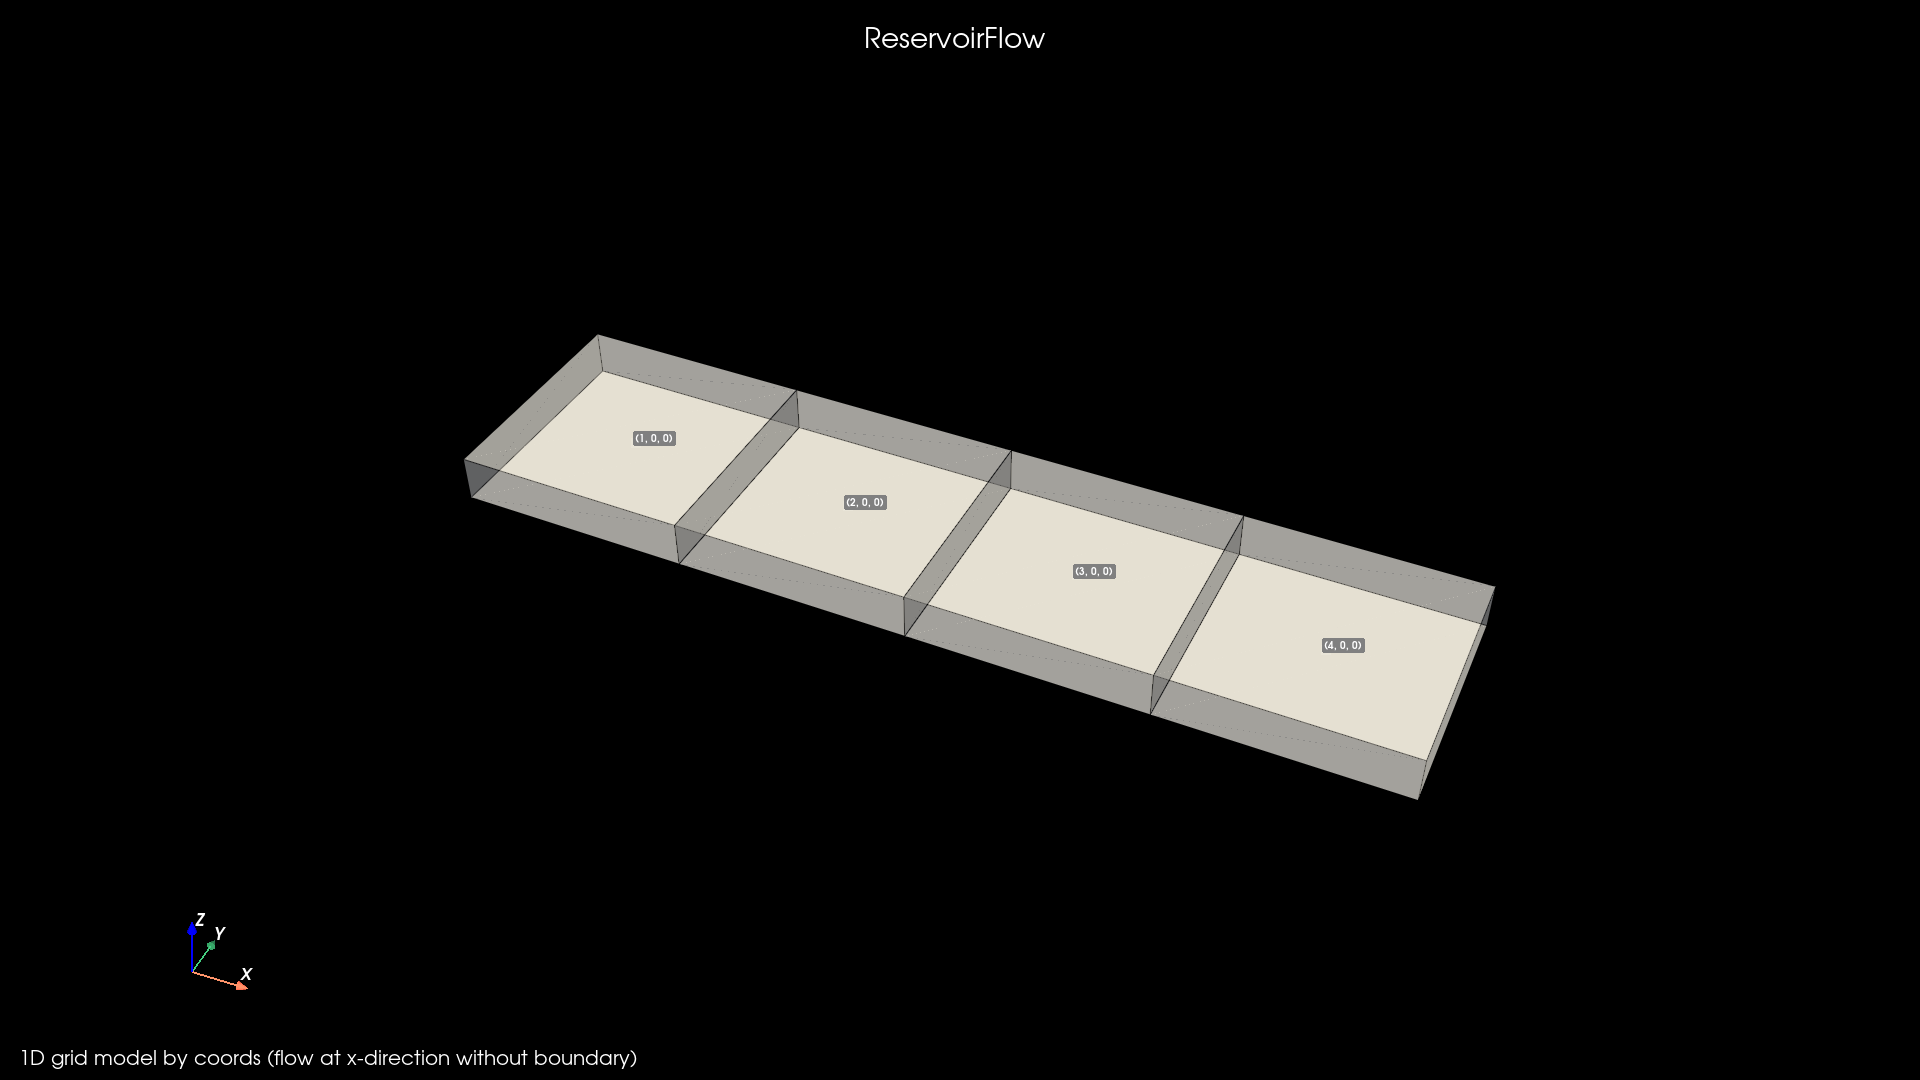

In [16]:
# Show the grid model with cells id
grid.show(
    label="coords",
    boundary=False,
    static=True,
    notebook=True,
    azimuth=25,
)

### Cells id

Cells id are arranged in natural order starting from the bottom left corner and can be accessed in several ways:

- attribute `cells_id` provides cells_id without boundary cells as flat array:

In [7]:
grid.cells_id

array([1, 2, 3, 4])

- more options can be found under `get_cells_id()` method:

In [8]:
cells_id = grid.get_cells_id(boundary=False, fshape=True, fmt="array")
cells_id.shape  # -> (nz, ny, nx)

(1, 1, 4)

Note: `fshape` (flow shape) argument provides the `cells_id` array as flow shape (nz, ny, nx) and `boundary` argument can be used to include or exclude boundary cells.

Using `nz=3`, but actually `nz=5` (i.e. 5 layers) in total including upper and lower boundaries. If you do not want to deal with boundary cells just set `boundary=False`.